# Week 8 Machine Learning Homework Solution

Navdeep Mugathihalli Kumaregowda - nm4686

---

### Exercise 1: Sigmoid Function Implementation

Implementing the sigmoid function from scratch and visualizing it.

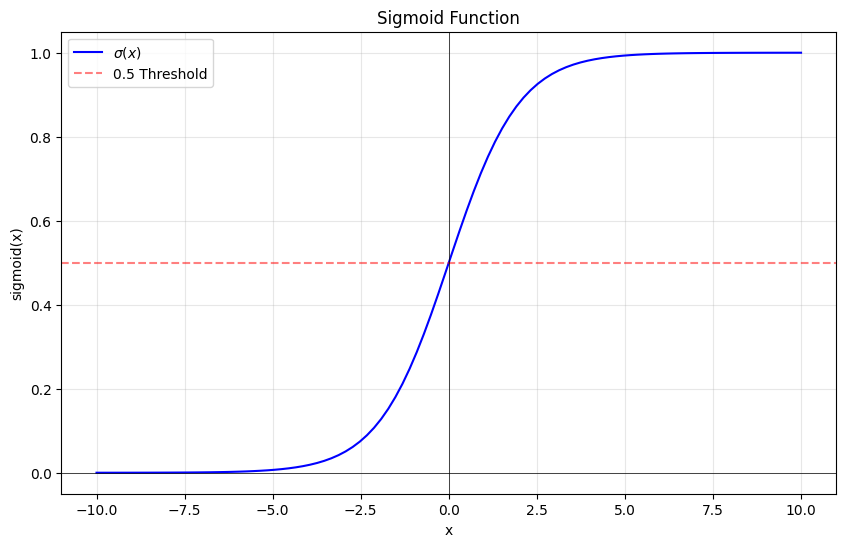

Sigmoid function test:
sigmoid(-5) = 0.0067
sigmoid(-2) = 0.1192
sigmoid(0) = 0.5000
sigmoid(2) = 0.8808
sigmoid(5) = 0.9933


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Implement the sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid function for input x

    Parameters:
    x: input value or array

    Returns:
    sigmoid of x
    """
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x_values = np.linspace(-10, 10, 100)

# TODO: Compute sigmoid values for x_values
y_values = sigmoid(x_values)

# TODO: Create a plot of the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$\sigma(x)$', color='blue')

plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='0.5 Threshold')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)

plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# TODO: Test your implementation with specific values
test_values = [-5, -2, 0, 2, 5]
print("Sigmoid function test:")
for val in test_values:
    # Print sigmoid of each test value
    result = sigmoid(val)
    print(f"sigmoid({val}) = {result:.4f}")

For Exercise 1, I implemented the sigmoid activation function using the standard formula 1 / (1 + exp(-x)). I then plotted the function over the range of -10 to 10 to visualize its behavior. The resulting graph displayed the expected S-shaped curve, crossing exactly at 0.5 when x is 0. The test values further confirmed the implementation is correct, with outputs approaching 0 for negative inputs and 1 for positive inputs.

### Exercise 2: Logistic Regression Probability Calculation

Use the sigmoid function to calculate class probabilities.

In [ ]:
import numpy as np

# Re-defining sigmoid from Exercise 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sample feature values and model coefficients
feature1 = 1.5
feature2 = -0.8
bias = 0.5
coef1 = 0.8
coef2 = -0.3

# TODO: Calculate the linear combination z
z = bias + (coef1 * feature1) + (coef2 * feature2)

# TODO: Use sigmoid to calculate probability of class 1
probability = sigmoid(z)

print(f"Linear combination z: {z:.4f}")
print(f"Probability of class 1: {probability:.4f}")

# TODO: Based on a threshold of 0.5, make a prediction
prediction = 1 if probability >= 0.5 else 0
print(f"Predicted class: {prediction}")

# TODO: Create a function that takes features, coefficients, and bias
# and returns both probability and prediction
def predict_probability(features, coefficients, bias, threshold=0.5):
    """
    Calculate probability and prediction using sigmoid function
    """
    # Your code here
    z = bias + np.dot(features, coefficients)

    prob = sigmoid(z)

    pred = 1 if prob >= threshold else 0

    return prob, pred

# Test the function
test_features = [1.5, -0.8]
test_coefficients = [0.8, -0.3]
test_bias = 0.5

prob, pred = predict_probability(test_features, test_coefficients, test_bias)
print(f"\nTest - Probability: {prob:.4f}, Prediction: {pred}")

Linear combination z: 1.9400
Probability of class 1: 0.8744
Predicted class: 1

Test - Probability: 0.8744, Prediction: 1


For Exercise 2, I calculated the linear combination z by summing the bias with the product of features and coefficients, resulting in a value of 1.94. I then applied the sigmoid function to this value, which yielded a probability of roughly 0.8744. Since this is greater than the 0.5 threshold, the model predicted Class 1. I also wrote a reusable function to automate this process for any set of inputs.

### Exercise 3: Confusion Matrix Implementation

Implement a confusion matrix calculation from scratch.

Confusion Matrix Components:
True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1


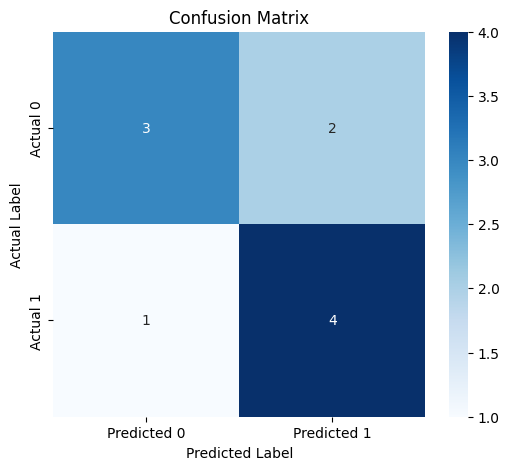

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample true labels and predictions
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# TODO: Calculate TP, TN, FP, FN from scratch
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate confusion matrix components
    """
    TP = TN = FP = FN = 0

    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 0:
            TN += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 1 and pred == 0:
            FN += 1

    return TP, TN, FP, FN

# TODO: Test your function
TP, TN, FP, FN = calculate_confusion_matrix(y_true, y_pred)

print("Confusion Matrix Components:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# TODO: Create a visualization of the confusion matrix

conf_matrix = np.array([[TN, FP], [FN, TP]])
# Your plotting code here
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

For Exercise 3, I built a function to manually calculate the confusion matrix. I did this by iterating through the paired true and predicted labels and checking their values to categorize them as True Positives, True Negatives, False Positives, or False Negatives. After counting these up, I visualized the results in a heatmap, which confirmed we had 4 TP, 3 TN, 2 FP, and 1 FN.

### Exercise 4: Classification Metrics Calculation

Implement accuracy, precision, recall, and F1-score from scratch.


In [ ]:
# TODO: Implement classification metrics using confusion matrix components
def calculate_metrics(TP, TN, FP, FN):
    """
    Calculate classification metrics from confusion matrix components
    """
    total = TP + TN + FP + FN
    accuracy = (TP + TN) / total if total > 0 else 0

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

# TODO: Calculate metrics using the confusion matrix from Exercise 3

TP, TN, FP, FN = 4, 3, 2, 1

accuracy, precision, recall, f1 = calculate_metrics(TP, TN, FP, FN)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Classification Metrics:
Accuracy: 0.7000
Precision: 0.6667
Recall: 0.8000
F1-Score: 0.7273


For Exercise 4, I implemented the four key classification metrics: accuracy, precision, recall, and F1-score. Using the confusion matrix counts from the previous exercise (TP=4, TN=3, FP=2, FN=1), I calculated each metric manually. The model achieved an accuracy of 70%, with a recall of 80% and precision of roughly 67%, resulting in a balanced F1-score of 0.73.